In [1]:
# Note: This is a hack to allow importing from the parent directory
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

In [38]:
CIFAR10.__dict__  # TODO copy classes and class_to_idx

{'root': '../data/CIFAR10/train',
 'transform': Compose(
     ToTensor()
     Lambda()
 ),
 'target_transform': None,
 'transforms': StandardTransform
 Transform: Compose(
                ToTensor()
                Lambda()
            ),
 'train': True,
 'data': array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
 

In [2]:
import torch
from torchvision import datasets
from constants import CIFAR10_TRANSFORM
from utils import (
    generate_random_splat,
    merge_spherical_harmonics,
    save_gs_data,
    load_gs_data,
    tensor_to_image,
)

NUM_POINTS = 1024  # 32x32
CIFAR10 = datasets.CIFAR10(
    root="../data/CIFAR10/train",
    train=True,
    download=True,
    transform=CIFAR10_TRANSFORM,
)
means, quats, scales, opacities, colors, viewmats, Ks, sh0, shN = generate_random_splat(
    NUM_POINTS
)
image = tensor_to_image(CIFAR10[0][0])
label = CIFAR10[0][1]
splat = torch.nn.ParameterDict(
    {
        "mean": torch.nn.Parameter(means),
        "quat": torch.nn.Parameter(quats),
        "scale": torch.nn.Parameter(scales),
        "opacity": torch.nn.Parameter(opacities),
        "color": torch.nn.Parameter(colors),
        "viewmat": torch.nn.Parameter(viewmats),
        "Ks": torch.nn.Parameter(Ks),
        "sh0": torch.nn.Parameter(sh0),
        "shN": torch.nn.Parameter(shN),
    }
)
print(image, label, splat)

splat = merge_spherical_harmonics(splat)
save_gs_data(image, label, splat, Path("test.pt"))
image, label, splat = load_gs_data(Path("test.pt"))
print(image, label, splat)

Files already downloaded and verified
<PIL.Image.Image image mode=RGB size=32x32 at 0x7E0FD8313810> 6 ParameterDict(
    (Ks): Parameter containing: [torch.FloatTensor of size 3x3]
    (color): Parameter containing: [torch.FloatTensor of size 1024x3]
    (mean): Parameter containing: [torch.FloatTensor of size 1024x3]
    (opacity): Parameter containing: [torch.FloatTensor of size 1024x1]
    (quat): Parameter containing: [torch.FloatTensor of size 1024x4]
    (scale): Parameter containing: [torch.FloatTensor of size 1024x3]
    (sh0): Parameter containing: [torch.FloatTensor of size 1024x1]
    (shN): Parameter containing: [torch.FloatTensor of size 1024x2]
    (viewmat): Parameter containing: [torch.FloatTensor of size 4x4]
)
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x7E0FD82EA010> 6 ParameterDict(
    (Ks): Parameter containing: [torch.FloatTensor of size 3x3]
    (color): Parameter containing: [torch.FloatTensor of size 1024x3]
    (mean): Parameter containing:

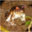

In [3]:
image

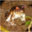

In [ ]:
from utils import merge_spherical_harmonics, save_gs_data, load_gs_data

splat = merge_spherical_harmonics(splat)
save_gs_data(image, label, splat, Path("test.pt"))
image, label, splat = load_gs_data(Path("test.pt"))
image